In [4]:
cd ./Desktop

C:\Users\sbin\Desktop


In [5]:
import cv2

# Load image
image_path = "./images.jpg"
image = cv2.imread(image_path)
clone = image.copy()

# Initialize list of bounding boxes
bounding_boxes = []

# Mouse callback function
def draw_rectangle(event, x, y, flags, param):
    global ref_point, cropping

    if event == cv2.EVENT_LBUTTONDOWN:
        ref_point = [(x, y)]
        cropping = True

    elif event == cv2.EVENT_LBUTTONUP:
        ref_point.append((x, y))
        cropping = False

        cv2.rectangle(image, ref_point[0], ref_point[1], (0, 255, 0), 2)
        cv2.imshow("image", image)
        bounding_boxes.append((ref_point[0][0], ref_point[0][1], ref_point[1][0], ref_point[1][1]))

# Set up the mouse callback function
cv2.namedWindow("image")
cv2.setMouseCallback("image", draw_rectangle)

# Keep looping until the 'q' key is pressed
while True:
    cv2.imshow("image", image)
    key = cv2.waitKey(1) & 0xFF

    if key == ord("r"):
        image = clone.copy()
    elif key == ord("q"):
        break

# Close all windows
cv2.destroyAllWindows()

# Print the bounding boxes
print(bounding_boxes)

[(44, 66, 211, 202), (28, 21, 94, 63), (79, 32, 148, 69), (131, 40, 195, 84)]


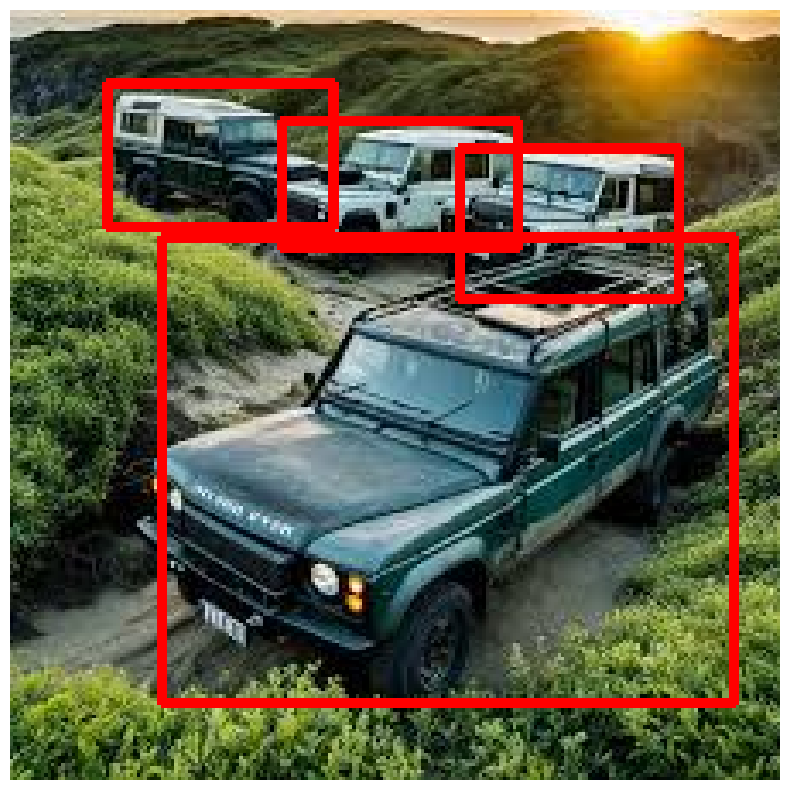

In [6]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = "./images.jpg"  # 실제 이미지 경로로 변경하세요
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Provided bounding boxes
manual_boxes = [
    (44, 66, 211, 202), # 첫 번째 자동차
    (28, 21, 94, 63),   # 두 번째 자동차
    (79, 32, 148, 69),  # 세 번째 자동차
    (131, 40, 195, 84)  # 네 번째 자동차
]

# Draw the provided bounding boxes on the image
image_with_manual_boxes_provided = image_rgb.copy()
for box in manual_boxes:
    x1, y1, x2, y2 = box
    cv2.rectangle(image_with_manual_boxes_provided, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(image_with_manual_boxes_provided)
plt.axis('off')
plt.show()

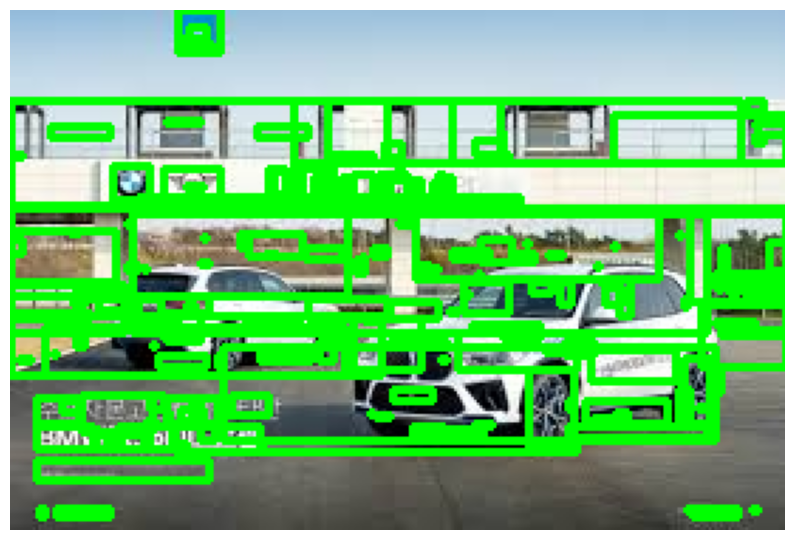

In [7]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = "image.png"  # 실제 이미지 경로로 변경하세요
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Use edge detection to find contours
edges = cv2.Canny(gray, 100, 200)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes on the image
bounding_boxes = []
image_with_boxes = image_rgb.copy()
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    bounding_boxes.append((x, y, x + w, y + h))
    cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(image_with_boxes)
plt.axis('off')
plt.show()
